# Decision Trees

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier



In [5]:
df = pd.read_csv("/home/raaggeeprime/MachineLearningImplementations/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
def analyzer(max_depth):
    data = pd.read_csv("/home/raaggeeprime/MachineLearningImplementations/Social_Network_Ads.csv")
    X = data.iloc[:, 2:4].values
    y = data.iloc[:, -1].values

    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X, y)

    a = np.arange(start=X[:, 0].min()-1, stop=X[:, 0].max()+1, step=0.1)
    b = np.arange(start=X[:, 1].min()-1, stop=X[:, 1].max()+1, step=100)

    XX, YY = np.meshgrid(a, b)

    input_array = np.array([XX.ravel(), YY.ravel()]).T

    labels = clf.predict(input_array)

    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)

## Case of overfitting
We can see multiple regions where the point is being overfitted. \
Example\
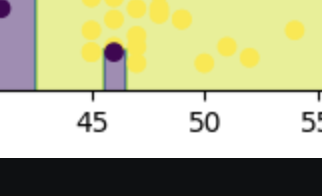

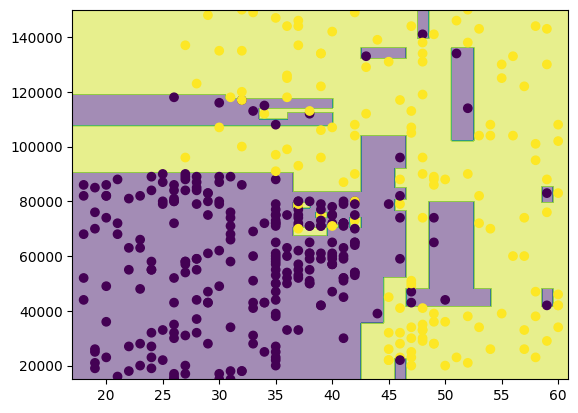

In [16]:
analyzer(None)

## Case of Underfitting
When we provide the minimal value of max depth, it is visible that the model overfits. There are multiple points which are in yellow region where as they are bound to be in purple region

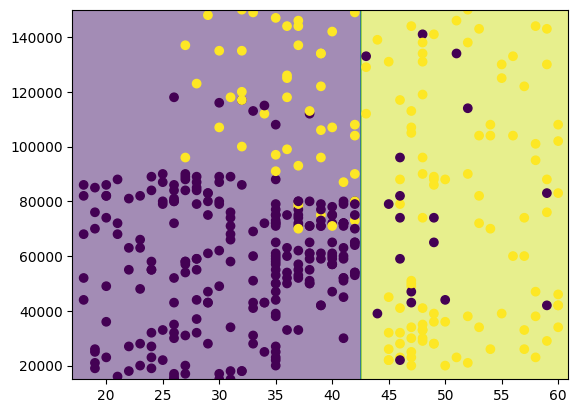

In [20]:
analyzer(1)

Thus we can control this by selecting the optimal value of max depth. 

# Other hyperparameters of decision trees
- criteria: gini/entropy/log_loss
- splitter: best/random : It means how are we splitting nodes of the tree. On the basis of above criteria or randomly. Randomly does reduces overfitting
- max_depth: controls the growth of the decision tree. If None, the model will overfit and with smaller value the model will underfit.
- min_sample_split: We control the split based on setting the minimum number of rows. This is also one way to prune the decision tree. More value of min_sample_split underfits the model and less value overfits the model.
- min_sample_leaf: Works same as min_sample_split. Splits the model based on a criteria of samples.
- max features: we can control the features on which the decision tree cand fit. The features are selected randomly.
- max_leaf_nodes: Controlling the maximum number of leaf nodes of a tree. higher value leads to overfit and vice versa
- min_impurity: the split will happen only when a node's error exceedes a min_impurity value.

# All the other fundamentals like random forest, bagging and boosting needs fundamentals of DTs.